In [1]:
import pandas as pd

In [7]:
df_link=pd.read_csv("../output_csv/links.csv")
df_movie=pd.read_csv("../output_csv/movies.csv")
df_tag=pd.read_csv("../output_csv/tags.csv")
df_rating=pd.read_csv("../output_csv/ratings.csv")

In [23]:
df_movie.shape

(9742, 3)

In [24]:
df_rating.shape

(100836, 4)

In [25]:
counts=df_ratings["userId"].nunique()
counts

610

In [26]:
# Assuming you have DataFrames named df_movie, df_tag, df_link, and df_rating

# Find movieId for "The Matrix (1999)" in df_movie
matrix_movie = df_movie[df_movie['title'] == 'Matrix, The (1999)']
matrix_movie_id = matrix_movie['movieId'].values[0]

# Filter tags for the specific movieId in df_tag
matrix_tags = df_tag[df_tag['movieId'] == matrix_movie_id]

# Display the tags
correct_tags = matrix_tags['tag'].tolist()
print(correct_tags)


['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [27]:
movie_ratings_count = df_ratings.groupby('movieId')['rating'].count()

# Find the movieId with the maximum number of ratings
max_ratings_movie_id = movie_ratings_count.idxmax()

# Get the corresponding movie title
# max_ratings_movie_title = df_ratings.loc[df_ratings['movieId'] == max_ratings_movie_id]['title'].iloc[0]

print(max_ratings_movie_id)

356


In [28]:
# Assuming you have a DataFrame named df_rating
movie_title = "Terminator 2: Judgment Day (1991)"

# Find movieId for the specified movie title
movie_info = df_rating.merge(df_movie[['movieId', 'title']], on='movieId', how='inner')
movie_id = movie_info[movie_info['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the specific movieId
ratings_for_movie = df_rating[df_rating['movieId'] == movie_id]

# Calculate the average rating
average_rating = ratings_for_movie['rating'].mean()

print(f"The average user rating for '{movie_title}' is: {average_rating:}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.970982142857143


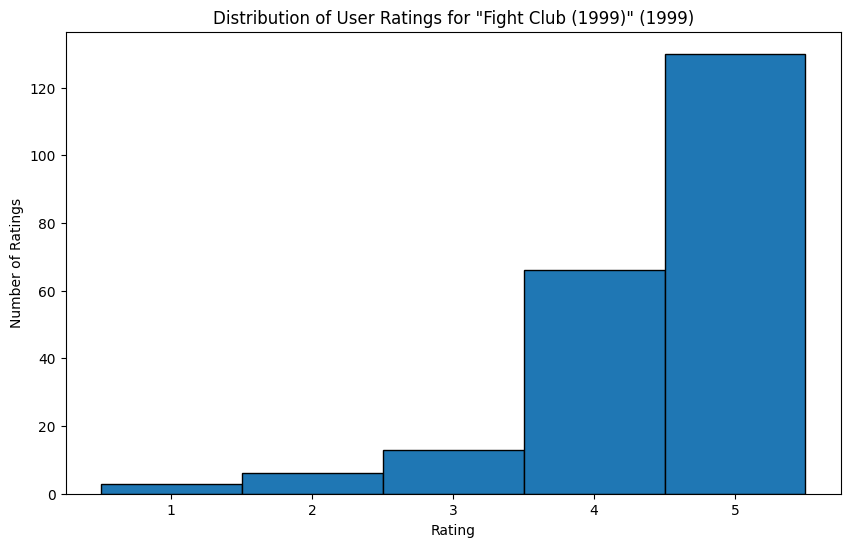

In [11]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df_rating
movie_title = "Fight Club (1999)"

# Find movieId for the specified movie title
movie_info = df_rating.merge(df_movie[['movieId', 'title']], on='movieId', how='inner')
movie_id = movie_info[movie_info['title'] == movie_title]['movieId'].values[0]

# Filter ratings for the specific movieId
ratings_for_movie = df_rating[df_rating['movieId'] == movie_id]

# Plotting the distribution of user ratings
plt.figure(figsize=(10, 6))
plt.hist(ratings_for_movie['rating'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5], edgecolor='black')
plt.title(f'Distribution of User Ratings for "{movie_title}" (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

In [12]:
# Assuming you have DataFrames df_rating and df_movie
# Step 1: Group user ratings based on movieId and apply count and mean
grouped_ratings = df_rating.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()

# Step 2: Inner join with df_movie on movieId
merged_df = pd.merge(df_movie, grouped_ratings, on='movieId', how='inner')

# Step 3: Filter movies with more than 50 user ratings
filtered_movies = merged_df[merged_df['count'] > 50]

# Display the result
print(filtered_movies[['movieId', 'title', 'count', 'mean']])

      movieId                             title  count      mean
0           1                  Toy Story (1995)    215  3.920930
1           2                    Jumanji (1995)    110  3.431818
2           3           Grumpier Old Men (1995)     52  3.259615
5           6                       Heat (1995)    102  3.946078
6           7                    Sabrina (1995)     54  3.185185
...       ...                               ...    ...       ...
8287   106782   Wolf of Wall Street, The (2013)     54  3.916667
8354   109374  Grand Budapest Hotel, The (2014)     52  3.778846
8358   109487               Interstellar (2014)     73  3.993151
8457   112852    Guardians of the Galaxy (2014)     59  4.050847
8673   122904                   Deadpool (2016)     54  3.833333

[436 rows x 4 columns]


In [13]:
# Assuming you have the filtered DataFrame named filtered_movies from the previous code

# Find the movie with the highest average rating
most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]

# Display the result
print("Most Popular Movie based on Average User Ratings:")
print(most_popular_movie[['movieId', 'title', 'count', 'mean']])


Most Popular Movie based on Average User Ratings:
movieId                                 318
title      Shawshank Redemption, The (1994)
count                                   317
mean                               4.429022
Name: 277, dtype: object


In [14]:
# Assuming you have the filtered DataFrame named filtered_movies from the previous code

# Sort the DataFrame by the count of user ratings in descending order
top_popular_movies = filtered_movies.sort_values(by='count', ascending=False).head(5)

# Display the top 5 popular movies based on user ratings count
print("Top 5 Popular Movies based on Number of User Ratings:")
print(top_popular_movies[['movieId', 'title', 'count', 'mean']])

Top 5 Popular Movies based on Number of User Ratings:
      movieId                             title  count      mean
314       356               Forrest Gump (1994)    329  4.164134
277       318  Shawshank Redemption, The (1994)    317  4.429022
257       296               Pulp Fiction (1994)    307  4.197068
510       593  Silence of the Lambs, The (1991)    279  4.161290
1938     2571                Matrix, The (1999)    278  4.192446


In [15]:
# Assuming you have the filtered DataFrame named filtered_movies from the previous code

# Filter Sci-Fi movies from the DataFrame
scifi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi')]

# Sort Sci-Fi movies by the count of user ratings in descending order
sorted_scifi_movies = scifi_movies.sort_values(by='count', ascending=False)

# Find the third most popular Sci-Fi movie
third_most_popular_scifi_movie = sorted_scifi_movies.iloc[2]

# Display the result
print("Third Most Popular Sci-Fi Movie based on Number of User Ratings:")
print(third_most_popular_scifi_movie[['movieId', 'title', 'count', 'mean']])

Third Most Popular Sci-Fi Movie based on Number of User Ratings:
movieId                     480
title      Jurassic Park (1993)
count                       238
mean                       3.75
Name: 418, dtype: object


In [18]:
pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:

import requests
from bs4 import BeautifulSoup

# Step 1: Read "links.csv"
df_links = pd.read_csv('links.csv')

# Step 2: Construct IMDB Review URLs
df_links['imdb_review_url'] = 'http://www.imdb.com/title/' + df_links['imdbId'].astype(str) + '/reviews'

# Step 3: Web Scraping
for index, row in df_links.iterrows():
    imdb_review_url = row['imdb_review_url']
    response = requests.get(imdb_review_url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        # Add your scraping logic to extract reviews from the soup
        reviews = soup.find_all('div', class_='text show-more__control')
        for review in reviews:
            print(review.get_text(strip=True))
    else:
        print(f"Failed to fetch reviews for movie with IMDb ID: {row['imdbId']}")

# Note: Adjust the scraping logic based on the actual HTML structure of the IMDB reviews page.


Failed to fetch reviews for movie with IMDb ID: 114709
Failed to fetch reviews for movie with IMDb ID: 113497
Failed to fetch reviews for movie with IMDb ID: 113228
Failed to fetch reviews for movie with IMDb ID: 114885
Failed to fetch reviews for movie with IMDb ID: 113041
Failed to fetch reviews for movie with IMDb ID: 113277
Failed to fetch reviews for movie with IMDb ID: 114319
Failed to fetch reviews for movie with IMDb ID: 112302
Failed to fetch reviews for movie with IMDb ID: 114576
Failed to fetch reviews for movie with IMDb ID: 113189
Failed to fetch reviews for movie with IMDb ID: 112346
Failed to fetch reviews for movie with IMDb ID: 112896
Failed to fetch reviews for movie with IMDb ID: 112453
Failed to fetch reviews for movie with IMDb ID: 113987
Failed to fetch reviews for movie with IMDb ID: 112760
Failed to fetch reviews for movie with IMDb ID: 112641
Failed to fetch reviews for movie with IMDb ID: 114388
Failed to fetch reviews for movie with IMDb ID: 113101
Failed to 

KeyboardInterrupt: 

In [22]:


# Assuming you have df_links DataFrame
df_links = pd.read_csv('links.csv')

# Construct IMDB Review URLs
df_links['imdb_review_url'] = 'http://www.imdb.com/title/' + df_links['imdbId'].astype(str) + '/reviews'

# Display the DataFrame with the new column
print(df_links)

      movieId   imdbId    tmdbId                            imdb_review_url
0           1   114709     862.0   http://www.imdb.com/title/114709/reviews
1           2   113497    8844.0   http://www.imdb.com/title/113497/reviews
2           3   113228   15602.0   http://www.imdb.com/title/113228/reviews
3           4   114885   31357.0   http://www.imdb.com/title/114885/reviews
4           5   113041   11862.0   http://www.imdb.com/title/113041/reviews
...       ...      ...       ...                                        ...
9737   193581  5476944  432131.0  http://www.imdb.com/title/5476944/reviews
9738   193583  5914996  445030.0  http://www.imdb.com/title/5914996/reviews
9739   193585  6397426  479308.0  http://www.imdb.com/title/6397426/reviews
9740   193587  8391976  483455.0  http://www.imdb.com/title/8391976/reviews
9741   193609   101726   37891.0   http://www.imdb.com/title/101726/reviews

[9742 rows x 4 columns]
